[1 1 1 ... 0 0 0]
[1 1 1 ... 1 0 0]
[1 1 0 ... 0 0 0]
[ 1.+1.j  1.+1.j  1.-1.j ...  1.-1.j -1.-1.j -1.-1.j]


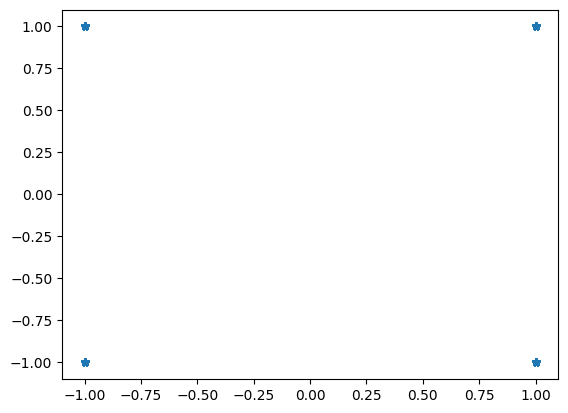

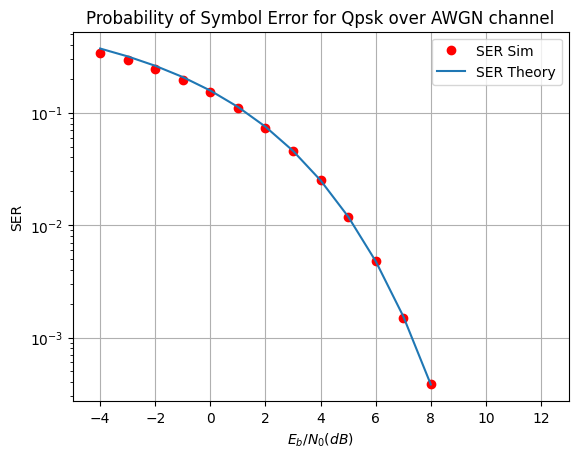

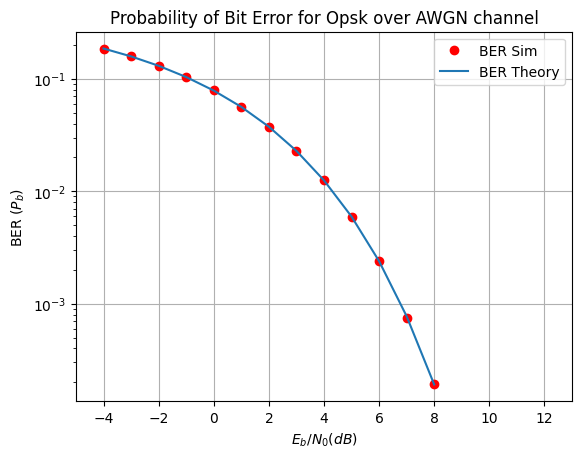

In [5]:
import numpy as np #for numerical computing
import matplotlib.pyplot as plt #for plotting functions 
from scipy.special import erfc #erfc/Q function
def ser(a,b,c,d):
    n=0
    for i in range(len(a)):
        if(a[i]!=b[i]) or (c[i]!=d[i]):
            n=n+1
    return n
nSym = 10**6 # Number of symbols to transmit
EbN0dBs = np.arange(start=-4, stop = 9, step = 1) # Eb/NO range in dB for simulation 
BER_sim = np.zeros(len(EbN0dBs)) # simulated Bit error rates
SER_sim = np.zeros(len (EbN0dBs)) # simulated Bit error rates
M=2 #Number of points in BPSK constellation
m= np.arange(0,M) #all possible input symbols
k=np.log2(4)
EsN0dB =10*np.log10(k)+EbN0dBs
A = 1; #amplitude
constellation=-A*np.cos(m/M*2*np.pi) #reference constellation for BPSK 
inputSyms=np.random.randint(low=0, high= M, size=nSym) #Random 1's and 0's as input to BPSK modulator
evendata=inputSyms[0::2]
odddata=inputSyms[1::2] 
print(inputSyms)
print (evendata) 
print(odddata)
s_even=constellation[evendata] #modulated symbols
s_odd=constellation[odddata]
s_qpsk=(s_even+1j*s_odd) 
print(s_qpsk)
plt.plot(np.real(s_qpsk), np.imag(s_qpsk),'*')


for i,EbN0 in enumerate(EsN0dB):
    gamma = 10** (EbN0/10) #SNRs to Linear scale
    P=sum(abs(s_qpsk)**2)/len(s_qpsk) #Actual power in the vector
    N0=P/gamma
    n= np.sqrt(N0/2)*(np.random.standard_normal(s_qpsk.shape)+1j* np.random.standard_normal(s_qpsk.shape)) 
    r =s_qpsk+n # computed noise vector
# Receiver
    detectedeven =(np.real(r)>= 0).astype(int) 
    detectedodd =(np.imag(r)>= 0).astype(int) 
    detected_sym=(2*detectedeven-1)+1j*(2*detectedodd-1)
    detectes_syms=np.zeros(len(inputSyms), dtype=int)
    detectes_syms[0::2]=detectedeven
    detectes_syms[1::2]=detectedodd
    BER_sim[i]= np.sum(detectes_syms != inputSyms)/nSym
    SER_sim[i]=2*ser(detectedeven, evendata, detectedodd, odddata)/nSym
BER_theory = 0.5*erfc(np.sqrt(10** (EbN0dBs/10)))
SER_theory =erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs, SER_sim, color='r',marker='o', linestyle='', label='SER Sim') 
ax.semilogy(EbN0dBs, SER_theory,marker='', linestyle='-', label='SER Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('SER')
ax.set_title('Probability of Symbol Error for Qpsk over AWGN channel') 
ax.set_xlim(-5,13); ax.grid(True)
ax.legend();plt.show()

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy (EbN0dBs, BER_sim,color="r",marker='o', linestyle='', label='BER Sim') 
ax.semilogy (EbN0dBs, BER_theory, marker='', linestyle='-',label='BER Theory') 
ax.set_xlabel('$E_b/N_0(dB)$'); ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for Opsk over AWGN channel')
ax.set_xlim(-5,13); ax.grid(True)
ax.legend();plt.show()

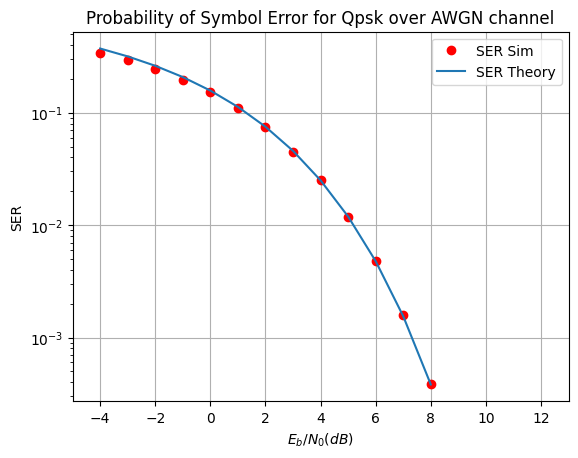

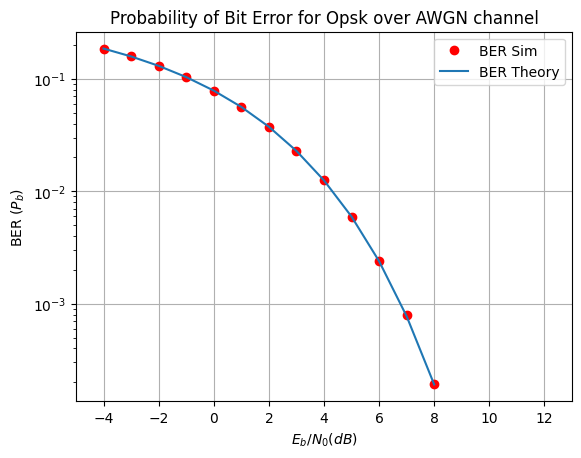

In [6]:
for i,EbN0 in enumerate(EsN0dB):
    gamma = 10** (EbN0/10) #SNRs to Linear scale
    P=sum(abs(s_qpsk)**2)/len(s_qpsk) #Actual power in the vector
    N0=P/gamma
    n= np.sqrt(N0/2)*(np.random.standard_normal(s_qpsk.shape)+1j* np.random.standard_normal(s_qpsk.shape)) 
    r =s_qpsk+n # computed noise vector
# Receiver
    detectedeven =(np.real(r)>= 0).astype(int) 
    detectedodd =(np.imag(r)>= 0).astype(int) 
    detected_sym=(2*detectedeven-1)+1j*(2*detectedodd-1)
    detectes_syms=np.zeros(len(inputSyms), dtype=int)
    detectes_syms[0::2]=detectedeven
    detectes_syms[1::2]=detectedodd
    BER_sim[i]= np.sum(detectes_syms != inputSyms)/nSym
    SER_sim[i]=2*ser(detectedeven, evendata, detectedodd, odddata)/nSym
BER_theory = 0.5*erfc(np.sqrt(10** (EbN0dBs/10)))
SER_theory =erfc(np.sqrt(10**(EbN0dBs/10)))

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy(EbN0dBs, SER_sim, color='r',marker='o', linestyle='', label='SER Sim') 
ax.semilogy(EbN0dBs, SER_theory,marker='', linestyle='-', label='SER Theory')
ax.set_xlabel('$E_b/N_0(dB)$');ax.set_ylabel('SER')
ax.set_title('Probability of Symbol Error for Qpsk over AWGN channel') 
ax.set_xlim(-5,13); ax.grid(True)
ax.legend();plt.show()

fig, ax = plt.subplots(nrows=1,ncols = 1)
ax.semilogy (EbN0dBs, BER_sim,color="r",marker='o', linestyle='', label='BER Sim') 
ax.semilogy (EbN0dBs, BER_theory, marker='', linestyle='-',label='BER Theory') 
ax.set_xlabel('$E_b/N_0(dB)$'); ax.set_ylabel('BER ($P_b$)')
ax.set_title('Probability of Bit Error for Opsk over AWGN channel')
ax.set_xlim(-5,13); ax.grid(True)
ax.legend();plt.show()